# Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Building a simple CNN model



#### **Task 1: Reading the data**

Importing all the important libraries

In [2]:
# Importing the required libraries
import pathlib
import os
import PIL

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

You are expected to load the data in the Colab environment by mounting the Google Drive. This will allow you to access the files from Google drive through Colab. 

Steps:
1. Upload the dataset in your Google Drive in a separate folder. Avoid spaces in the name of the folder or the zip file.
2. Mount the Google Drive using the code given below.
3. Unzip the file to access images.
4. Check the path for the datasets - train and test.


Note: The code is commented for you to learn and then make edits to execute the command.

In [3]:
## If you are using the data by mounting the google drive, use the following:
from google.colab import drive
drive.mount('/content/gdrive')

## Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Your GDrive Directory
!ls /content/gdrive/MyDrive/CNN_assignment

Skin_cancer


Check the path mentioned in the output: `Skin cancer ISIC The International Skin Imaging Collaboration`

Provide the path for train and test images using pathlib library.

In [5]:
# Defining the path for train and test images
## To do: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Test")

In [6]:
list(data_dir_train.glob('*/*.jpg'))

[PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/ISIC_0025780 (1).jpg'),
 PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/ISIC_0025780.jpg'),
 PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/ISIC_0025825.jpg'),
 PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/ISIC_0025803.jpg'),
 PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/ISIC_0025953.jpg'),
 PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/ISIC_0025957.jpg'),
 PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/ISIC_0025992.jpg'),
 PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/ISIC_0026149.jpg'),
 PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/ISIC_0026040.jpg'),
 PosixPath('/content/gdrive/MyDri

Check whether the data has been extracted successfully.

In [7]:
# Train and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

Train images:	 2240
Test images:	 118


#### **Task 2: Loading the images using keras.preprocessing**

The images are still not loaded in the Colab environment. We have extracted them from the zip file. Now, you are expected to load them in the Colab notebook using the `preprocessing` attribute.

Let's load these images off disk using the helpful image_dataset_from_directory utility. You can refer to the following [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) to know more about the function. You can even refer to the additional notebooks on the page to check how the variables are defined.

Defining the parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Divide the training set into 2 parts: 
*   80% for training 
*   20% for validation



In [20]:
## Write your code for train dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=123)

Found 6740 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [19]:
for data, labels in train_ds.take(1):
    print(data.shape)
    print(labels.shape)

(32, 180, 180, 3)
(32,)


Each RGB image is of size 180 * 180, and each batch has 32 such images.
Data labels is a 1D array specifying a label against every image

In [18]:
## Write your code for validation dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=123)

Found 6740 files belonging to 9 classes.
Using 1348 files for validation.


In [21]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the 'class_names' attribute associated with the training and validation datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Task 3: Visualize the data**

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

Write the code to visualize one instance of all the nine classes present in the dataset

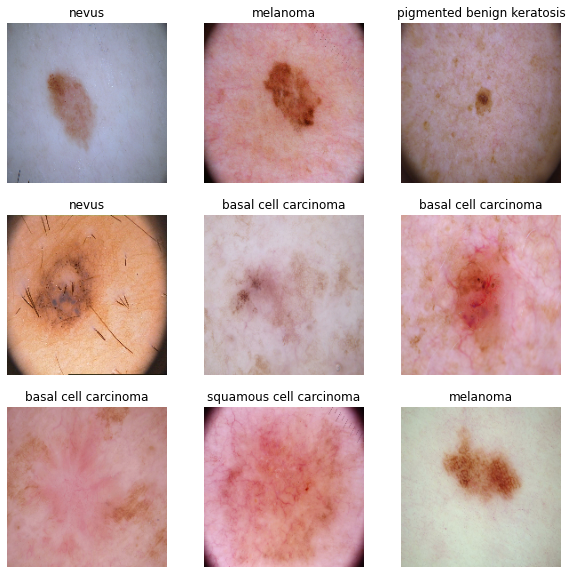

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#### Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Task 4: Create the model**
Create a CNN model, which can accurately detect 9 classes present in the dataset. 


*   Note: The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`. Use `layers.experimental.preprocessing.Rescaling` for this purpose.

In [ ]:
# Rescaling
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))
train_first = image_batch[0]
# Pixel values are normalized (between 0 and 1)
print(np.abs(train_first))

[[[0.68954253 0.45686278 0.427451  ]
  [0.6955883  0.46029416 0.4279412 ]
  [0.68316996 0.45228758 0.41944444]
  ...
  [0.7065363  0.4650324  0.43300664]
  [0.71127456 0.48235297 0.44362748]
  [0.70000005 0.465523   0.42630744]]

 [[0.69068635 0.45604578 0.42401963]
  [0.6921569  0.46176472 0.427451  ]
  [0.6892157  0.45718956 0.42549023]
  ...
  [0.7232025  0.49035946 0.45816988]
  [0.71519613 0.48088238 0.44362748]
  [0.7184641  0.48071903 0.45571873]]

 [[0.6897059  0.45964053 0.4178105 ]
  [0.6950981  0.46127453 0.42549023]
  [0.6934641  0.46241832 0.42924836]
  ...
  [0.71617615 0.49003252 0.4609477 ]
  [0.7132353  0.4789216  0.45588237]
  [0.7009804  0.46388906 0.44215712]]

 ...

 [[0.68823534 0.41862747 0.38055557]
  [0.6838236  0.4294118  0.3651961 ]
  [0.6864379  0.43643793 0.39901963]
  ...
  [0.72794133 0.46290872 0.41209143]
  [0.7200981  0.4534314  0.4034314 ]
  [0.7222223  0.45555565 0.40457526]]

 [[0.6846406  0.41045752 0.3648693 ]
  [0.6955883  0.4269608  0.3897059 ]


In [ ]:
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_val_ds))
val_first = image_batch[0]
# Pixel values are normalized (between 0 and 1)
print(np.abs(val_first))

[[[0.734804   0.71846414 0.76176476]
  [0.7406863  0.71519613 0.76225495]
  [0.736438   0.7138889  0.76699346]
  ...
  [0.72908485 0.71421564 0.736928  ]
  [0.73872554 0.72401965 0.7607844 ]
  [0.73790836 0.71176475 0.74967295]]

 [[0.7424837  0.71633995 0.75457525]
  [0.75000006 0.7156863  0.78578436]
  [0.74918306 0.7183007  0.779902  ]
  ...
  [0.74379146 0.7377453  0.7576798 ]
  [0.7313726  0.72303927 0.7553922 ]
  [0.7346407  0.71993446 0.7563725 ]]

 [[0.7354576  0.7137255  0.7637255 ]
  [0.7431373  0.727451   0.79754907]
  [0.75261444 0.73529416 0.7906863 ]
  ...
  [0.75441194 0.74395436 0.7897058 ]
  [0.7318628  0.7294118  0.77352947]
  [0.73186296 0.72026134 0.7522878 ]]

 ...

 [[0.72156864 0.6883988  0.72058827]
  [0.7289216  0.70245105 0.73627454]
  [0.7150327  0.6900327  0.72075164]
  ...
  [0.72385615 0.6846402  0.7473853 ]
  [0.7294118  0.68235296 0.7514706 ]
  [0.716013   0.65277815 0.7197718 ]]

 [[0.71176475 0.68415034 0.71127456]
  [0.7225491  0.68823534 0.7254902 ]


In [ ]:
### Your code goes here
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_height,img_width,3,)))
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(len(class_names)))

#### **Question**: 
Explain the following elements associated with the problem:
1.   Selection of stride value (Reason for using a high/low value)
2.   Padding strategy used (Same/Valid)

Stride value used is '1' along with padding value 'same' in the convolution to produce the output of the same size as the input.

#### **Task 5: Compile the model**
Choose an appropirate optimiser and loss function for model training.

In [ ]:
### Choose an appropirate optimiser and loss function
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train the model

In [ ]:
# The model needs to be trained for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 98s 2s/step - loss: 1.8755 - accuracy: 0.3789 - val_loss: 2.1103 - val_accuracy: 0.1496
Epoch 2/20
56/56 [==============================] - 50s 894ms/step - loss: 1.4980 - accuracy: 0.4777 - val_loss: 2.0513 - val_accuracy: 0.1830
Epoch 3/20
56/56 [==============================] - 50s 893ms/step - loss: 1.3209 - accuracy: 0.5424 - val_loss: 2.0868 - val_accuracy: 0.1830
Epoch 4/20
56/56 [==============================] - 50s 890ms/step - loss: 1.1871 - accuracy: 0.5848 - val_loss: 1.7337 - val_accuracy: 0.3460
Epoch 5/20
56/56 [==============================] - 50s 894ms/step - loss: 1.0497 - accuracy: 0.6239 - val_loss: 1.4763 - val_accuracy: 0.4911
Epoch 6/20
56/56 [==============================] - 50s 898ms/step - loss: 0.8850 - accuracy: 0.6791 - val_loss: 1.3061 - val_accuracy: 0.5469
Epoch 7/20
56/56 [==============================] - 50s 902ms/step - loss: 0.6727 - accuracy: 0.7662 - val_loss: 1.2548 - val_accuracy: 0.5580
Ep

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        1

#### Visualizing training results

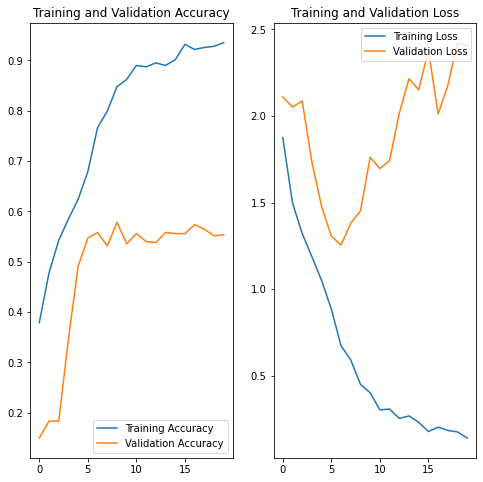

In [ ]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Model is overfitting since the training accuracy increases with epochs but there's a significant difference between the validation and training accuracy. The validation accuracy is substantially less as compared to training accuracy.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [ ]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times

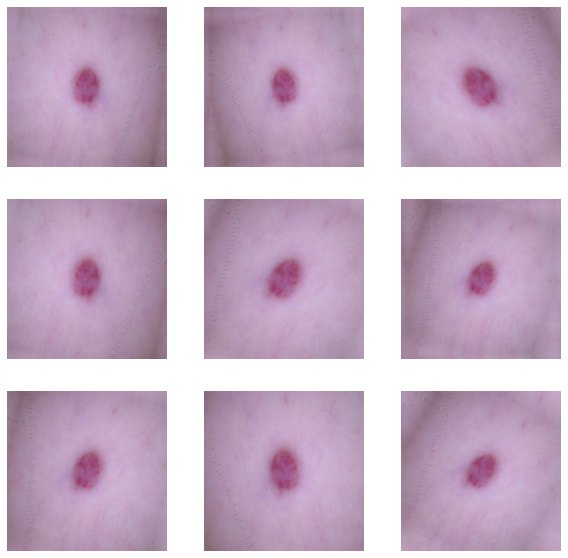

In [ ]:
# Visualizing how the augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### **Task 6: Create, compile and train the model**

Model Definition

In [ ]:
## Your code goes here
## You should also include dropouts to tackle with overfitting. (compulsory)
model = tf.keras.models.Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(len(class_names)))


Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer = 'adam',
              loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [ ]:
# Note: Train your model for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 48s 843ms/step - loss: 2.0231 - accuracy: 0.2500 - val_loss: 1.9301 - val_accuracy: 0.2500
Epoch 2/20
56/56 [==============================] - 47s 832ms/step - loss: 1.8477 - accuracy: 0.3415 - val_loss: 1.8866 - val_accuracy: 0.3058
Epoch 3/20
56/56 [==============================] - 47s 838ms/step - loss: 1.7144 - accuracy: 0.3862 - val_loss: 1.7900 - val_accuracy: 0.3594
Epoch 4/20
56/56 [==============================] - 47s 832ms/step - loss: 1.6005 - accuracy: 0.4347 - val_loss: 1.5252 - val_accuracy: 0.4464
Epoch 5/20
56/56 [==============================] - 47s 840ms/step - loss: 1.4950 - accuracy: 0.4693 - val_loss: 1.5556 - val_accuracy: 0.4888
Epoch 6/20
56/56 [==============================] - 46s 831ms/step - loss: 1.5184 - accuracy: 0.4654 - val_loss: 1.6614 - val_accuracy: 0.4665
Epoch 7/20
56/56 [==============================] - 46s 831ms/step - loss: 1.4193 - accuracy: 0.5167 - val_loss: 1.4589 - val_accuracy: 0.4888

#### Visualizing the results

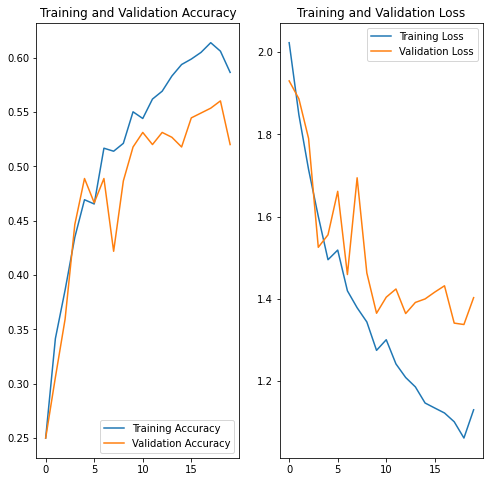

In [ ]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Overfitting is greatly reduced after augmentation. The difference between the training accuracy and validation accuracy is now significantly less as compared to the model before augmentation. So the model has improved.

## Distribution in the dataset

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<br>

#### **Task 7: Find the distribution of classes in the training dataset.**

In [9]:
## Your code goes here.
path_list = [x for x in (data_dir_train.glob('*/*.jpg'))]
len(path_list)

2240

In [26]:
path_list=[]
lesion_list=[]
for i in class_names: 
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,actinic keratosis
1,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,actinic keratosis
2,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,actinic keratosis
3,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,actinic keratosis
4,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,actinic keratosis
...,...,...
2235,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,vascular lesion
2236,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,vascular lesion
2237,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,vascular lesion
2238,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,vascular lesion


<BarContainer object of 9 artists>

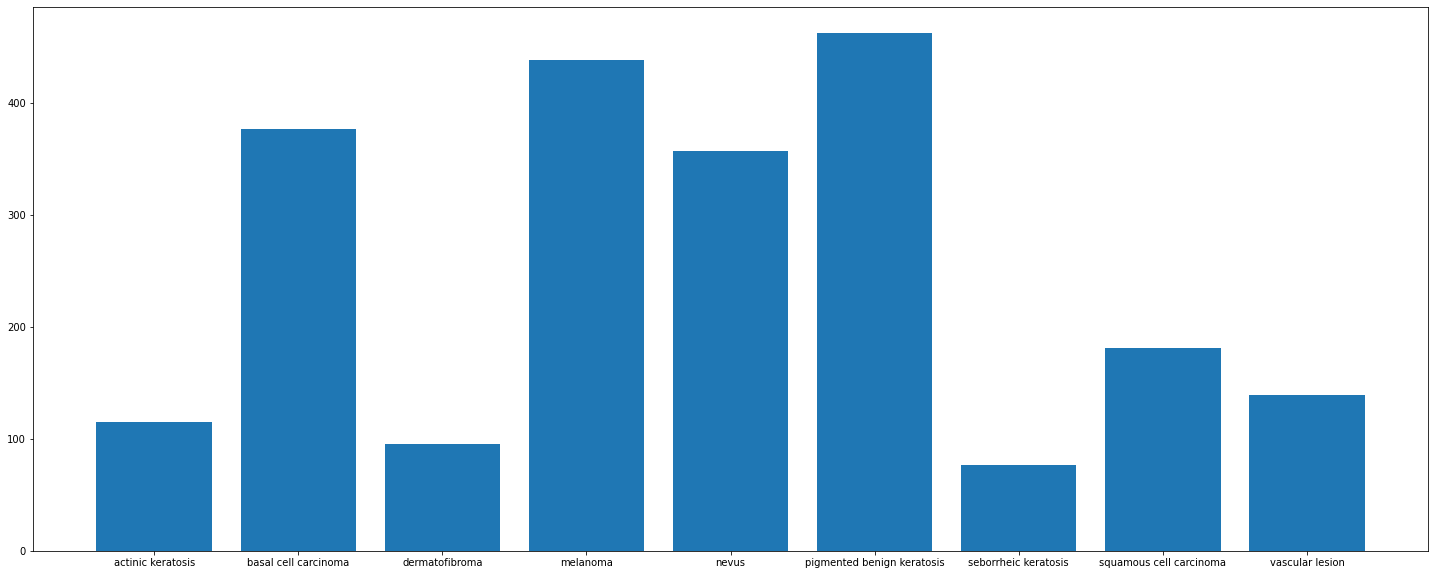

In [27]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Questions:**  
 - Which class has the least number of samples?
 - Which classes dominate the data in terms proportionate number of samples?


1. Seborrheic keratosis has the least number of samples
2. Pigmented Benign keratosis has the highest number of samples so it dominates the data

#### **Task 8: Rectifying the class imbalance**
You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [86]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [87]:
# Provide the path for the training dataset
path_to_training_dataset="/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
    ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F10741A0E10>:   0%|          | 1/500 [00:00<01:02,  7.98 Samples/s]

Initialised with 115 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F10716ED590>: 100%|██████████| 500/500 [00:25<00:00, 19.92 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F10716434D0>: 100%|██████████| 500/500 [00:23<00:00, 21.11 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F10716F4390>: 100%|██████████| 500/500 [00:24<00:00, 20.65 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F107160F7D0>: 100%|██████████| 500/500 [01:40<00:00,  4.99 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F10716D8A10>: 100%|██████████| 500/500 [01:40<00:00,  4.99 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1071699E90>: 100%|██████████| 500/500 [00:24<00:00, 20.61 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F10717730D0>: 100%|██████████| 500/500 [00:51<00:00,  9.70 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F10747AB2D0>: 100%|██████████| 500/500 [00:23<00:00, 20.93 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1073E53D50>: 100%|██████████| 500/500 [00:25<00:00, 19.71 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [12]:
# Count of images under each class after addition
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [89]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031430.jpg_8dd4cfc7-c339-44b6-a32e-b5e4a6ec1dd1.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025825.jpg_50756738-3ca9-4120-a1dd-721fd43a340c.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030826.jpg_0857e315-c039-4b36-b7c4-84eab71eb808.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026171.jpg_369155d5-589d-4976-af90-d4bbdd8bc9f6.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025953.jpg_9317e3ac-75de-441c-9770-512f6c211d1a.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028990.jpg_2fa3286b-74a7-467

In [90]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [91]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [92]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [93]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             615
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### **Task 9: Repeating the steps for balanced augmented data**

In [13]:
batch_size = 32
img_height = 180
img_width = 180

**Create a training dataset**

In [14]:
# Provide the subset value here
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6740 files belonging to 9 classes.
Using 5392 files for training.


**Create a validation dataset**

In [15]:
# Provide the subset value here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6740 files belonging to 9 classes.
Using 1348 files for validation.


**Create your model (make sure to include normalization)**

In [22]:
## Your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_height,img_width,3,)))
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(len(class_names)))

**Compile your model (Choose optimizer and loss function appropriately)**

In [23]:
## Your code goes here
model.compile(optimizer = 'adam',
              loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train your model**

In [24]:
# Note: Train your model for 30 epochs
## Your code goes here
epochs = 30

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 242s 1s/step - loss: 2.0199 - accuracy: 0.2331 - val_loss: 1.9971 - val_accuracy: 0.2129
Epoch 2/30
169/169 [==============================] - 208s 1s/step - loss: 1.6221 - accuracy: 0.3930 - val_loss: 1.4308 - val_accuracy: 0.4429
Epoch 3/30
169/169 [==============================] - 208s 1s/step - loss: 1.3440 - accuracy: 0.5028 - val_loss: 1.3105 - val_accuracy: 0.5045
Epoch 4/30
169/169 [==============================] - 207s 1s/step - loss: 1.1879 - accuracy: 0.5577 - val_loss: 1.1214 - val_accuracy: 0.5942
Epoch 5/30
169/169 [==============================] - 207s 1s/step - loss: 1.0259 - accuracy: 0.6326 - val_loss: 1.0240 - val_accuracy: 0.6291
Epoch 6/30
169/169 [==============================] - 207s 1s/step - loss: 0.8686 - accuracy: 0.6897 - val_loss: 0.8746 - val_accuracy: 0.6988
Epoch 7/30
169/169 [==============================] - 208s 1s/step - loss: 0.7066 - accuracy: 0.7441 - val_loss: 0.8225 - val_accuracy: 0.7151

**Visualize the model results**

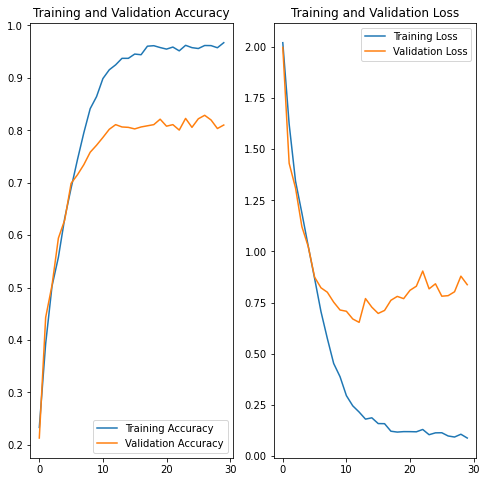

In [25]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Task 10: Analyzing the results** 


#### **Question:**
- Did you get rid of underfitting/overfitting from the model? 
- Did class rebalance help in the process?


1. This model solves the problem of extreme overfitting as the difference between the training and validation accuracy is not very significant 
2. Class rebalancing improved the accuracy of the model from 52% ro 81%, which is a great improvement. 